### Number of Cases

In [1]:
import pandas as pd
from pandas import DataFrame

#import data from csv

vaccination = pd.read_csv("data/covid-vaccination-policy.csv")
travel = pd.read_csv("data/international-travel-covid-4.csv")
lockdown = pd.read_csv("data/stay-at-home-covid.csv")

face_cover = pd.read_csv("data/face-covering-policies-covid.csv")
owid = pd.read_csv("data/owid-covid-data.csv")


#Series with g20 members according to wikipedia + spain
g20_members = pd.Series(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "South Korea", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Turkey", "United Kingdom", "United States", "Spain", "European Union"])

#filter data array for locations that match g20 countries
g20_data = owid[owid["location"].isin(g20_members)].reset_index(drop=True)
g20_data = g20_data.loc[:, g20_data.columns.intersection(["location", "date", "new_cases"])]
#cleaned data
g20_data

,location,date,new_cases
0,Argentina,2020-01-01,NaN
1,Argentina,2020-01-02,NaN
2,Argentina,2020-01-03,NaN
3,Argentina,2020-01-04,NaN
4,Argentina,2020-01-05,NaN
...,...,...,...
10129,United States,2021-05-23,12853.0
10130,United States,2021-05-24,25925.0
10131,United States,2021-05-25,22756.0
10132,United States,2021-05-26,24052.0


### Mask

In [2]:
 g20_face_cover = face_cover[face_cover["Entity"].isin(g20_members)].reset_index(drop=True)

In [3]:
phases = []

for country in g20_members:
    df = g20_face_cover[g20_face_cover["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["facial_coverings"] != level:
            phases.append([country, row["Day"], row["facial_coverings"]])
            level = row["facial_coverings"]
                           
    
face_cover_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
face_cover_phases["date"] = pd.to_datetime(face_cover_phases["date"], yearfirst=True)
face_cover_phases

,country,date,level_changes
0,Argentina,2020-04-14,3
1,Australia,2020-07-13,1
2,Australia,2020-07-30,4
3,Australia,2020-11-22,2
4,Australia,2021-01-08,4
...,...,...,...
63,United States,2020-04-06,3
64,United States,2020-07-01,4
65,Spain,2020-05-04,2
66,Spain,2020-05-21,3


### Vaccine

In [4]:
#TODO
g20_vacc = vaccination[vaccination["Entity"].isin(g20_members)].reset_index(drop=True)

phases = []

for country in g20_members:
    df = g20_vacc[g20_vacc["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["vaccination_policy"] != level:
            phases.append([country, row["Day"], row["vaccination_policy"]])
            level = row["vaccination_policy"]
                           
    
vaccination_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
vaccination_phases["date"] = pd.to_datetime(vaccination_phases["date"], yearfirst=True)
vaccination_phases

,country,date,level_changes
0,Argentina,2020-12-29,1
1,Argentina,2021-02-22,2
2,Argentina,2021-04-06,3
3,Australia,2021-02-21,2
4,Australia,2021-03-22,4
5,Brazil,2021-01-17,2
6,Brazil,2021-01-18,3
7,Canada,2020-12-15,2
8,Canada,2021-01-20,3
9,Canada,2021-05-17,4


### Travel Restriction

In [5]:
g20_travel = travel[travel["Entity"].isin(g20_members)].reset_index(drop=True)

In [6]:
phasesx = []

for country in g20_members:
    df = g20_travel[g20_travel["Entity"] == country].reset_index(drop=True)
    level1 = 0
    for index, row in df.iterrows():
        if row["international_travel_controls"] != level1:
            phasesx.append([country, row["Day"], row["international_travel_controls"]])
            level1 = row["international_travel_controls"]
                           
    
travel_phases = DataFrame(phasesx, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
travel_phases["date"] = pd.to_datetime(travel_phases["date"], yearfirst=True)
travel_phases

,country,date,level_changes
0,Argentina,2020-03-11,2
1,Argentina,2020-03-16,4
2,Argentina,2020-11-06,3
3,Argentina,2021-05-04,4
4,Australia,2020-02-01,3
...,...,...,...
82,United States,2020-02-02,2
83,United States,2020-03-02,3
84,Spain,2020-03-10,3
85,Spain,2020-03-17,4


### Stay at home




In [7]:
g20_lockdown = lockdown[lockdown["Entity"].isin(g20_members)].reset_index(drop=True)

In [8]:
phasesy = []

for country in g20_members:
    df = g20_lockdown[g20_lockdown["Entity"] == country].reset_index(drop=True)
    level2 = 0
    for index, row in df.iterrows():
        if row["stay_home_requirements"] != level2:
            phasesy.append([country, row["Day"], row["stay_home_requirements"]])
            level2 = row["stay_home_requirements"]
                           
    
lockdown_phases = DataFrame(phasesy, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
lockdown_phases["date"] = pd.to_datetime(lockdown_phases["date"], yearfirst=True)
lockdown_phases

,country,date,level_changes
0,Argentina,2020-03-19,3
1,Argentina,2020-04-27,2
2,Australia,2020-03-24,1
3,Australia,2020-04-02,2
4,Australia,2020-05-15,1
...,...,...,...
132,Spain,2020-07-04,1
133,Spain,2020-07-15,2
134,Spain,2020-08-10,1
135,Spain,2020-10-25,2


### Help Functions For Plotting

In [9]:
def get_dataframe_for_a_specific_country(df: DataFrame, country:str):
    return df[df["country"]==country]


def mergeDataframe(phase: DataFrame, cases: DataFrame):
    """
    merges dataframes on date for a specific country
    """
    return phase.merge(cases, on="date").drop(["location"],axis=1)


def fixLegend(plt, cases: DataFrame, colors: list, policyLabel: str, maxcase: int, pos: float):
    """
    plots invisible hlines so that the policies can always be shown in legend with the same order. 
    """

    plt.hlines(maxcase - maxcase*pos, xmin=cases.iloc[-1]["date"]-timedelta(0.000000001),
               xmax = cases.iloc[-1]["date"]+timedelta(0.000000001), colors = colors,
                label = policyLabel, linestyles="dashdot", linewidth=6)
    



def plot_policies_adjustments_as_hlines(plt, policyTime: DataFrame, colors: list, maxcase: int, pos: float):
    """
    plots a span which indicates the time a policy changes its level.
    """
    for ind, data in policyTime.iterrows():

        #vertical lines between each level of the policy
        plt.vlines(x = data[1], ymin= (maxcase- maxcase*pos) *0.975, ymax = (maxcase- maxcase*pos)*1.025, colors="white")

        #hlines
        if(ind == len(policyTime.index)-1):
            plt.hlines(maxcase*1.3- maxcase*pos, xmin=data[1], xmax =only_pain.iloc[-1]["date"], colors = colors[int(data[2])-1], linestyles="solid", linewidth=12)
        else:
            nextdata = policyTime.iloc[ind+1]
            plt.hlines(maxcase*1.3- maxcase*pos, xmin=data[1], xmax =nextdata[1], colors = colors[int(data[2])-1], linestyles="solid", linewidth=12)

### Plot

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

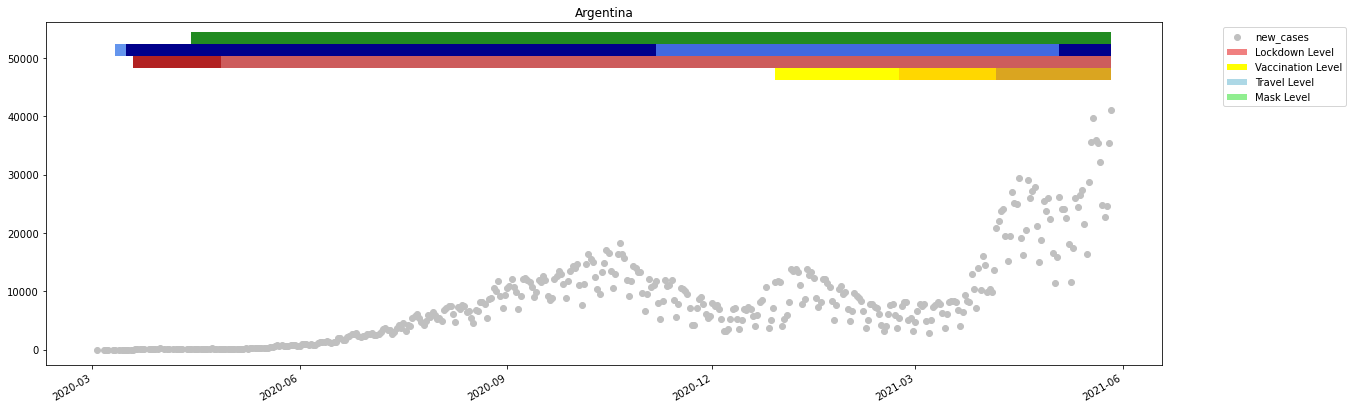

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

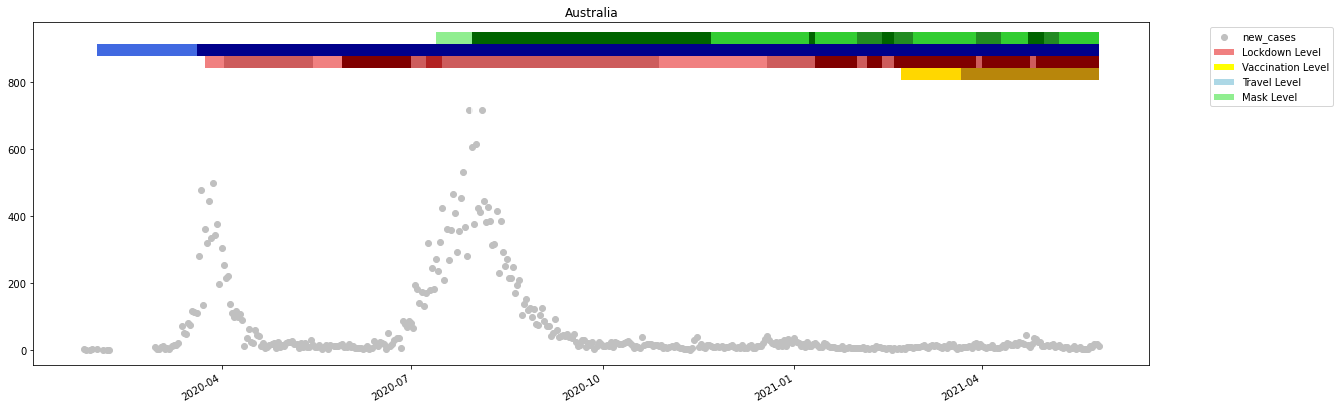

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

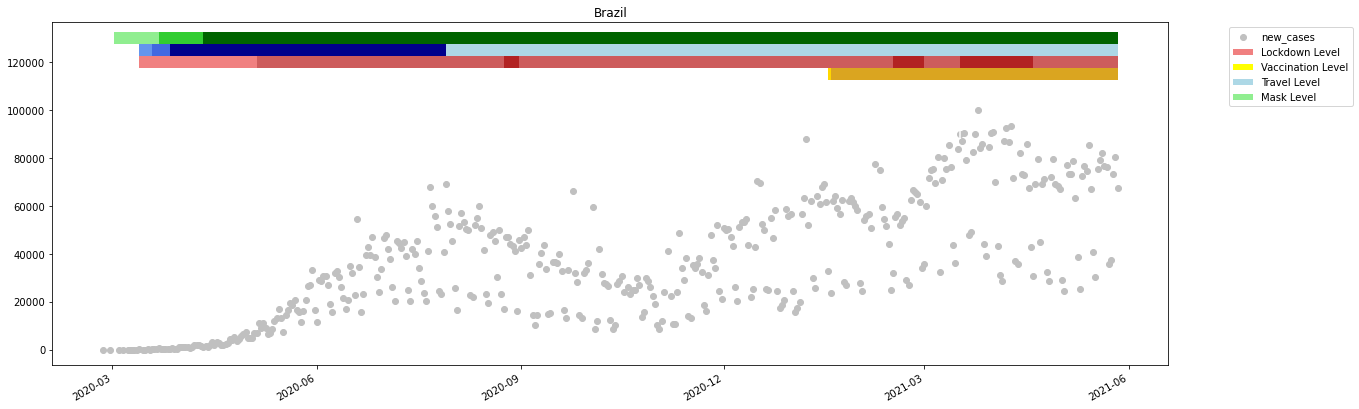

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

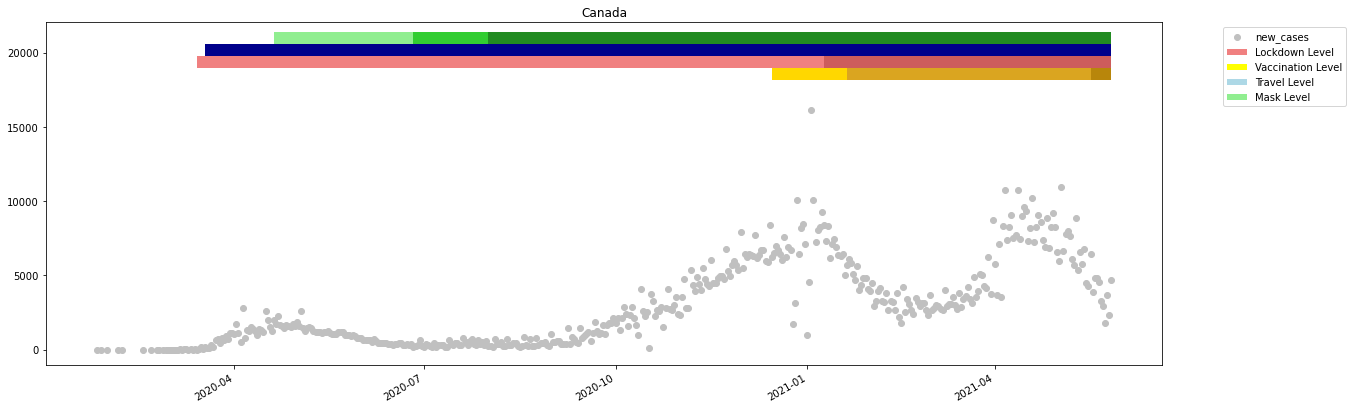

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

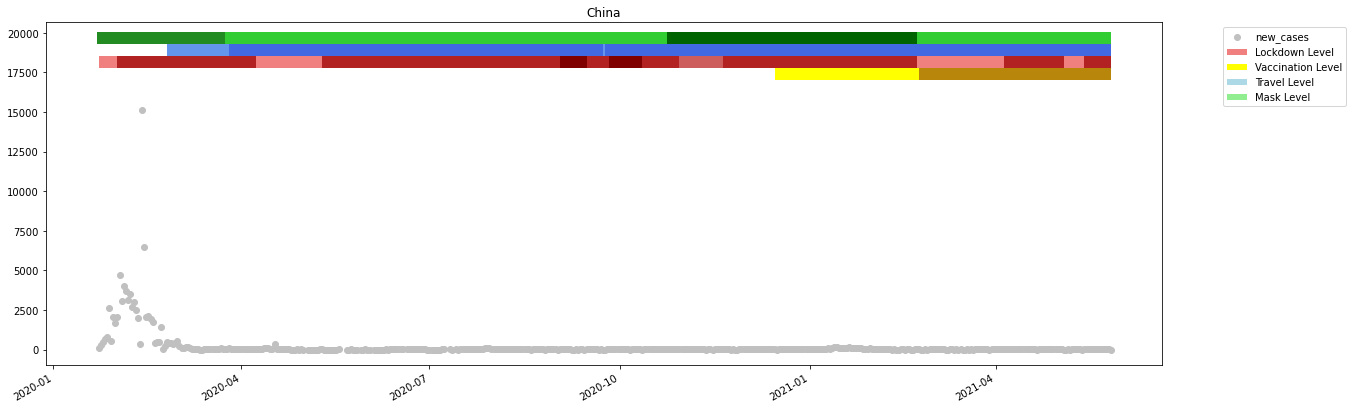

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

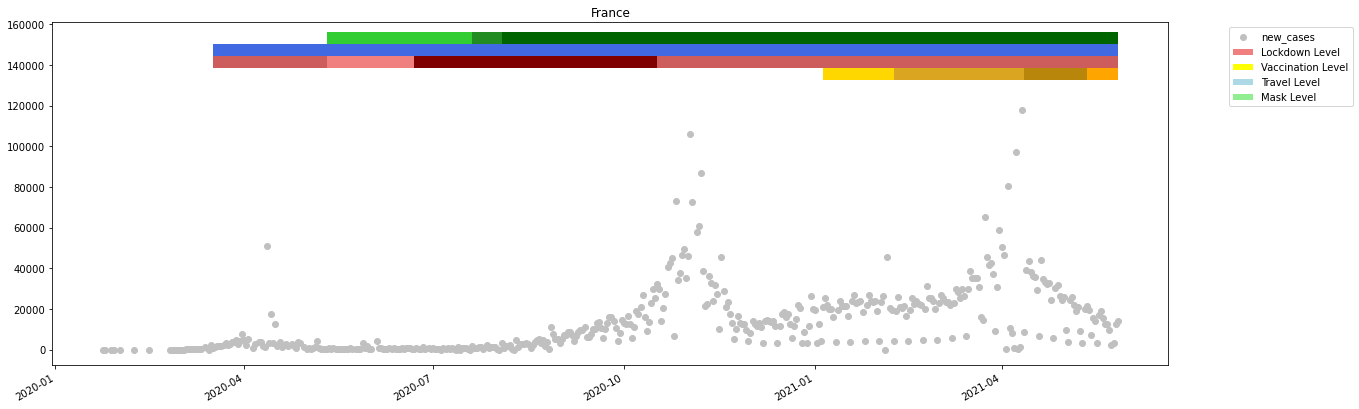

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

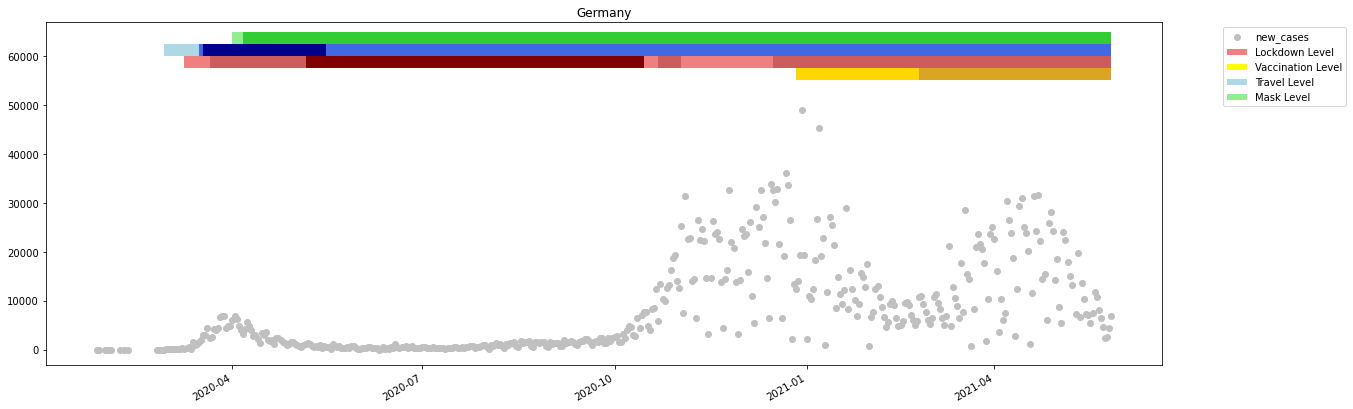

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

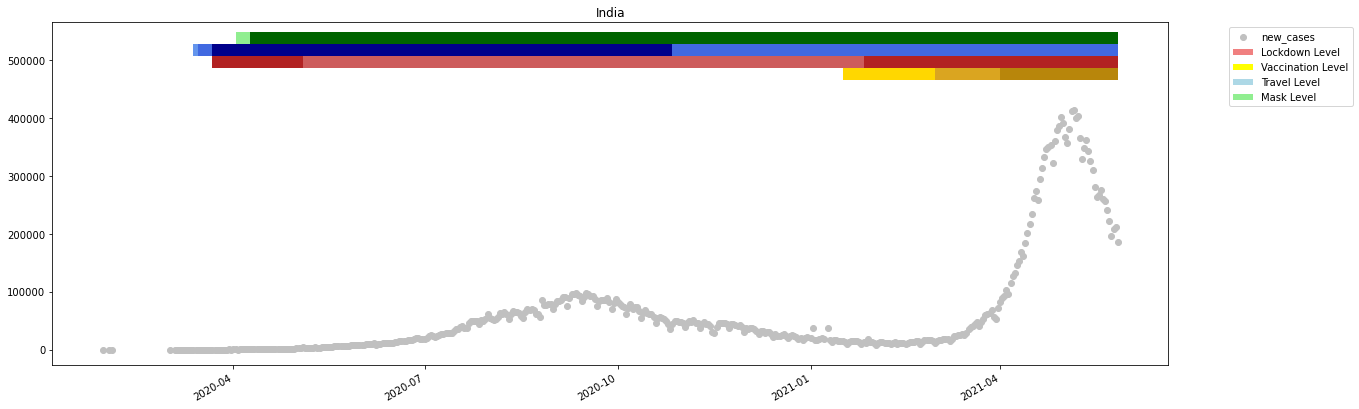

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

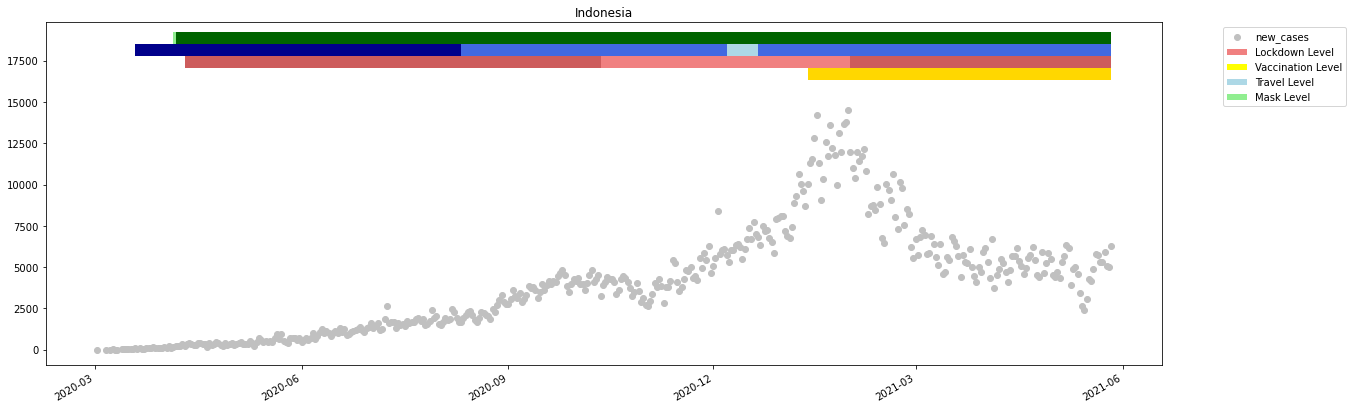

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

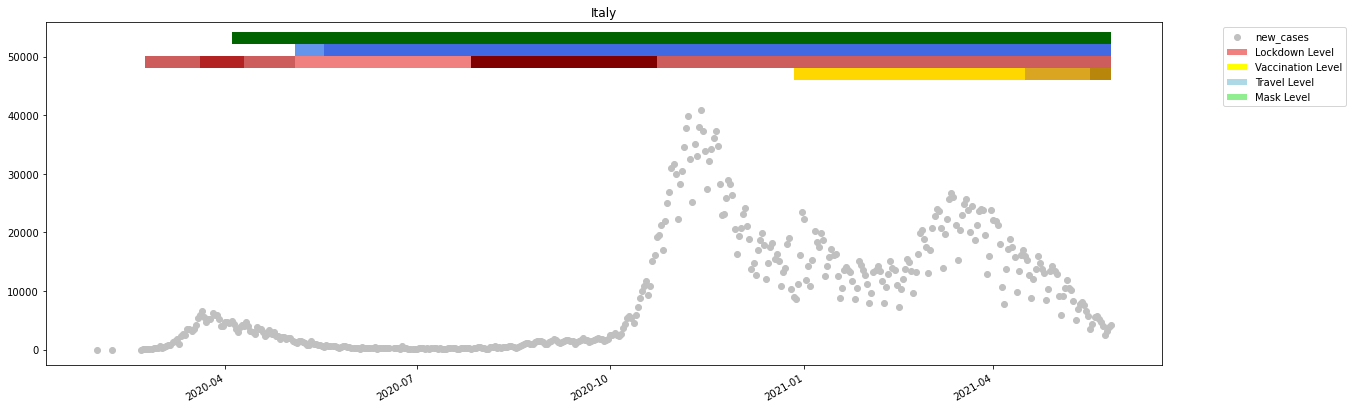

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

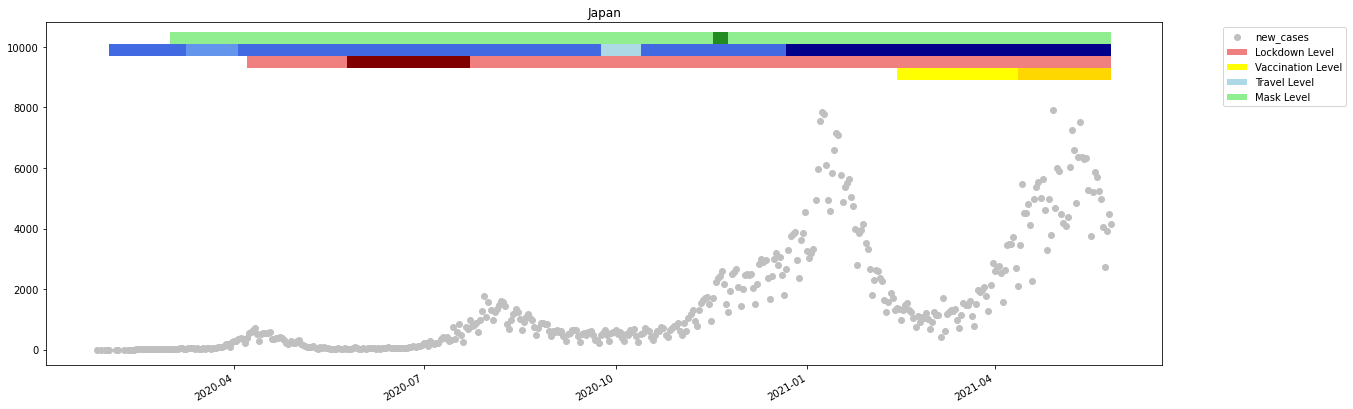

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

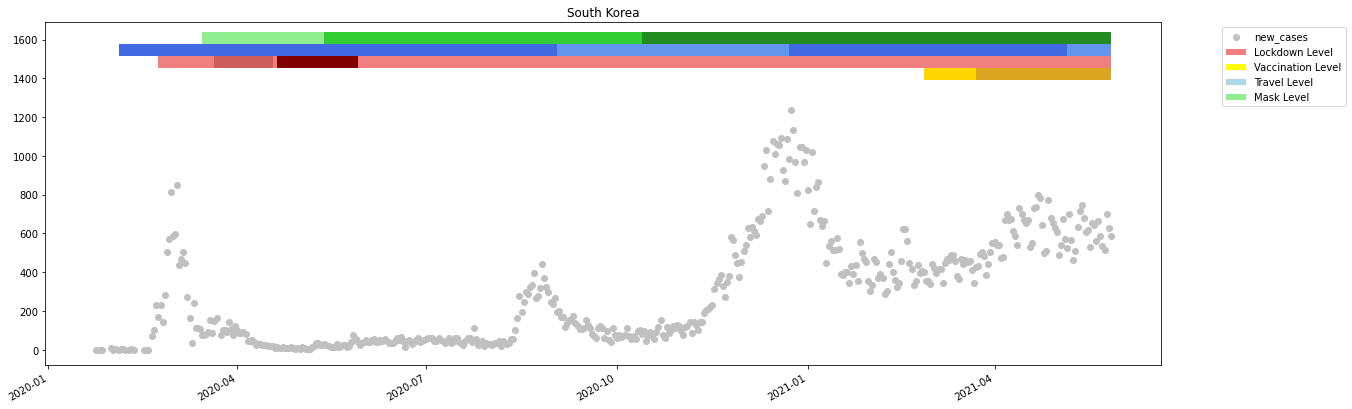

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

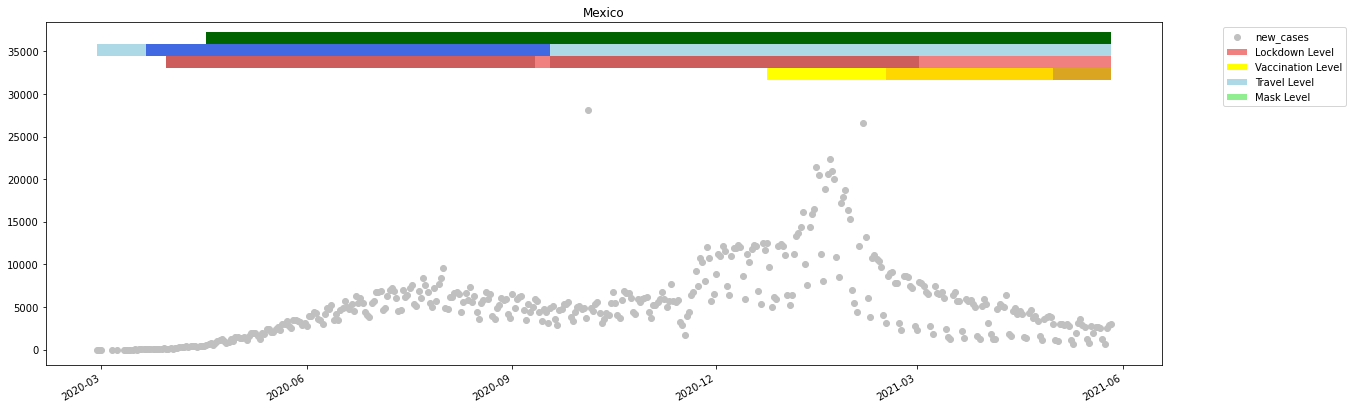

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

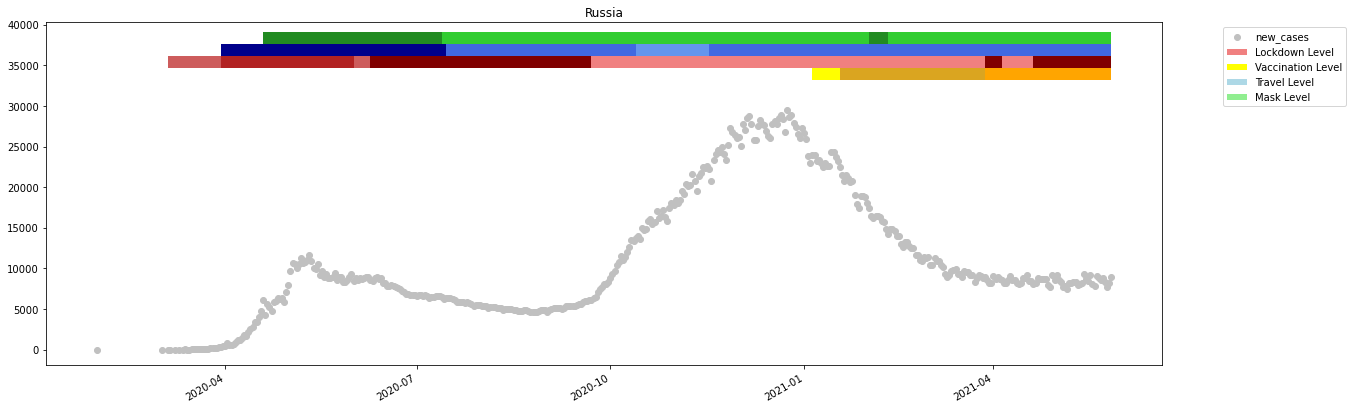

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

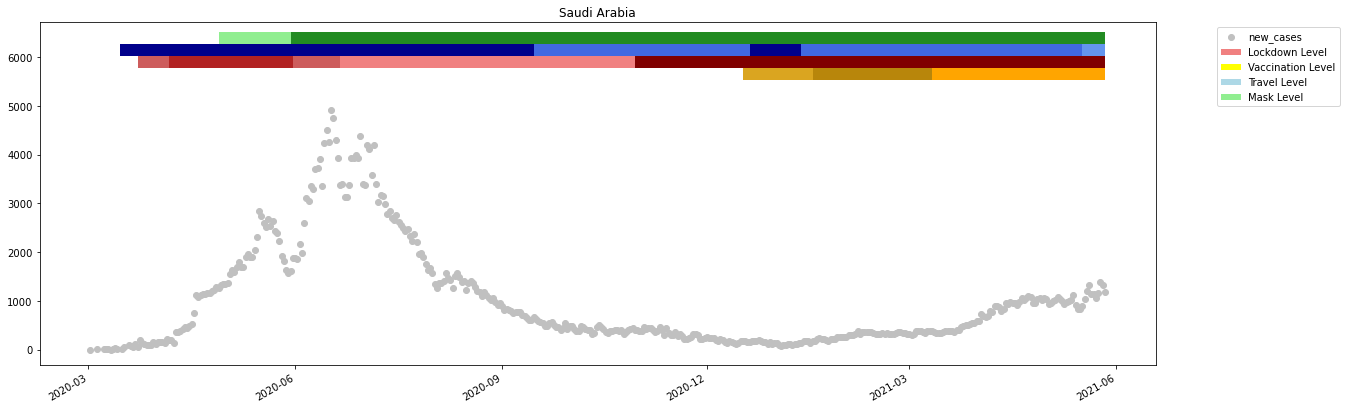

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

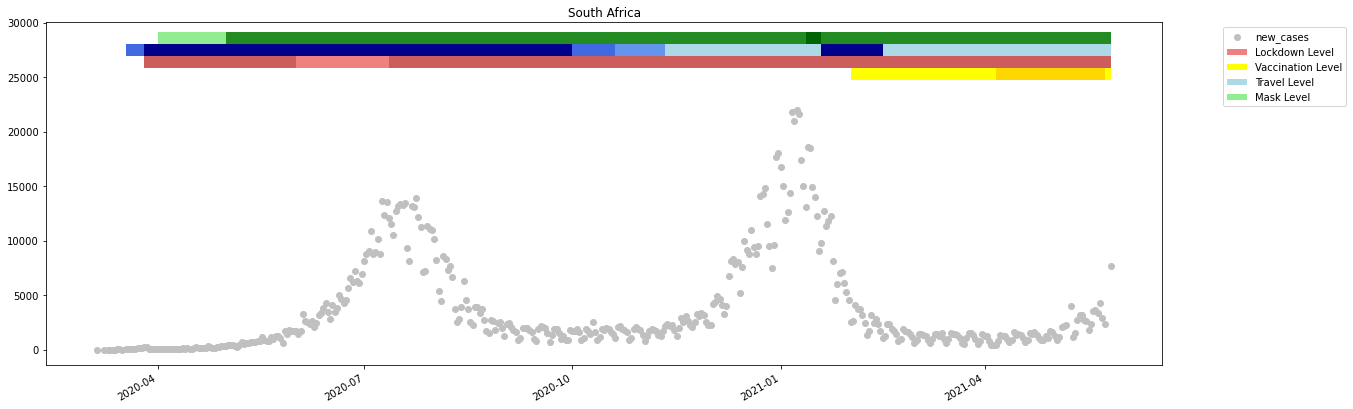

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

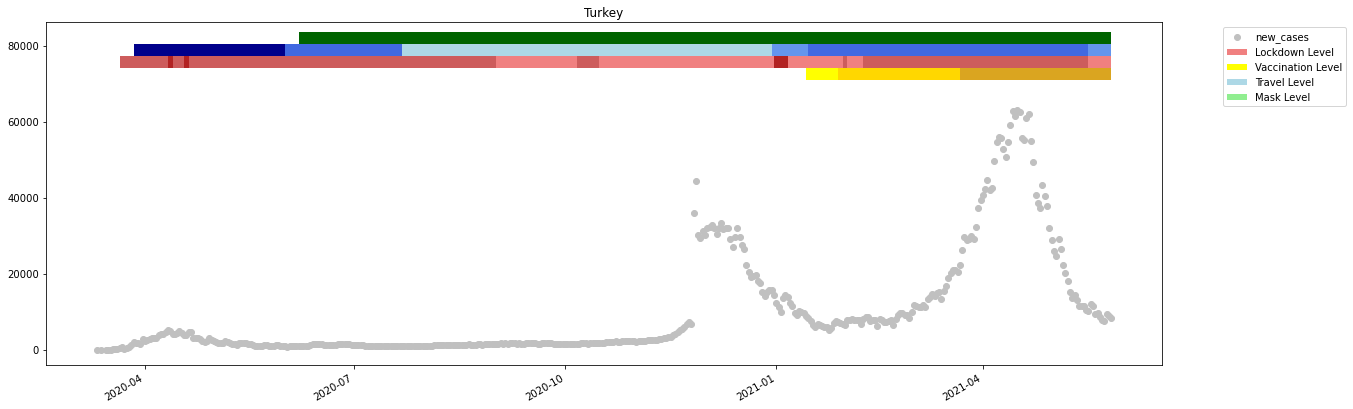

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

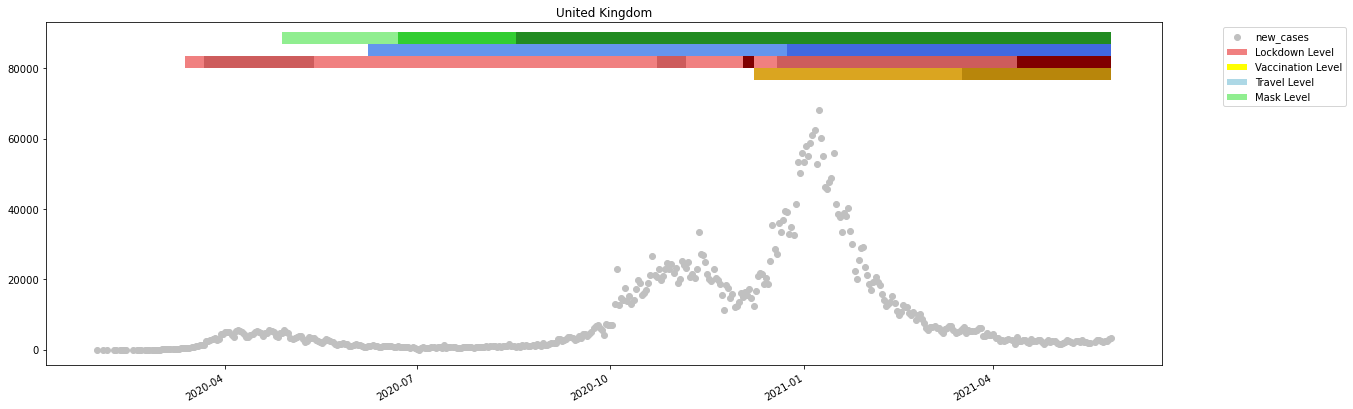

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

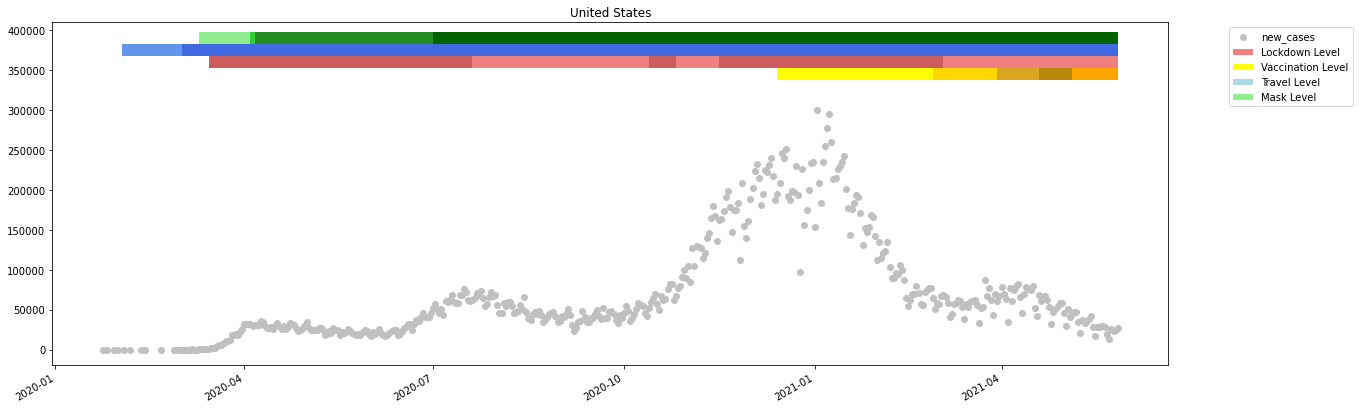

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

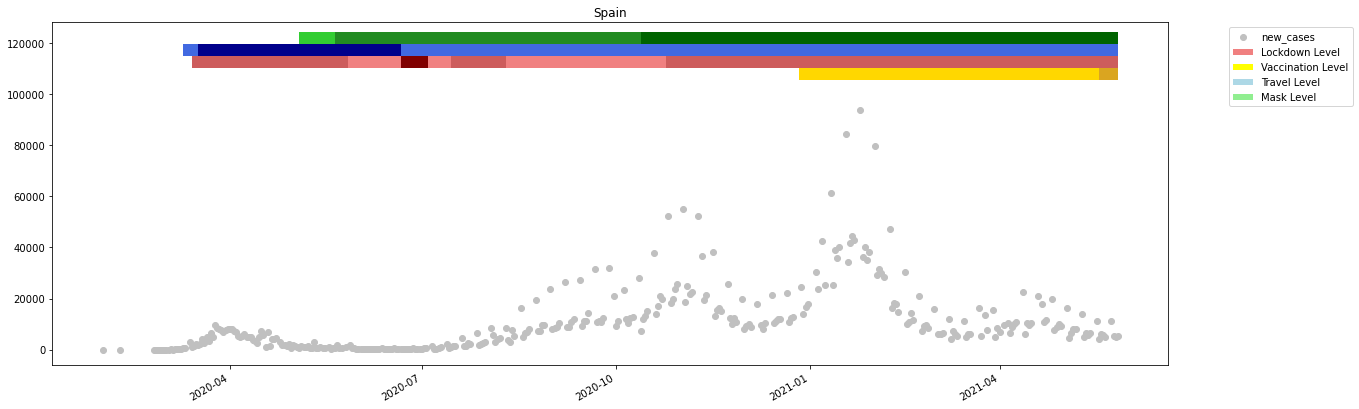

C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

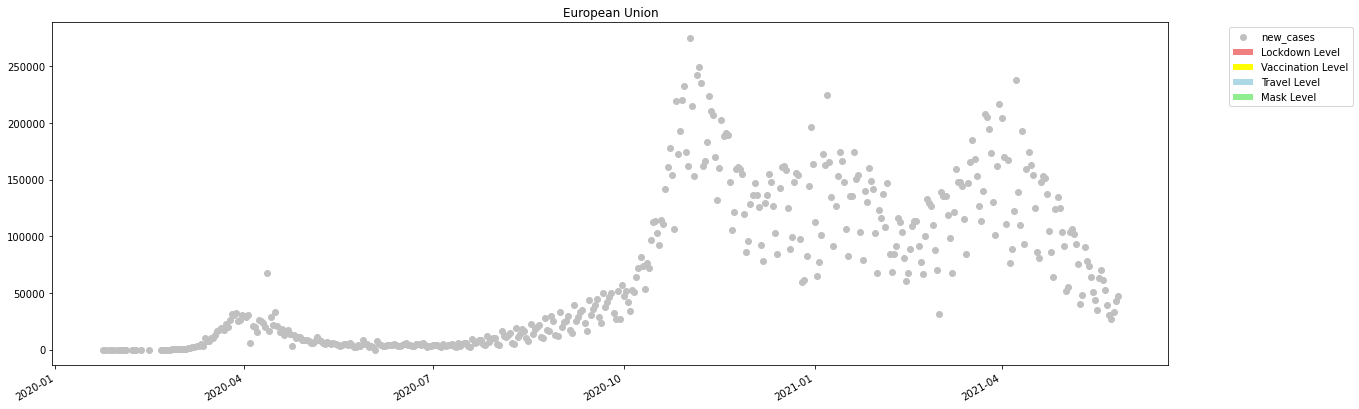

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
from datetime import timedelta

#plot each countries in g20
for loc in g20_members:
    
    #get number of cases dataframe and make sure the date is in datetime format
    only_pain = g20_data[g20_data["location"]==loc]
    only_pain["date"] = pd.to_datetime(only_pain["date"], yearfirst=True)
    only_pain["month"] = only_pain.date.dt.month_name()
    only_pain["year"] = only_pain.date.dt.year
    only_pain["day"] = only_pain.date.dt.day

    #get phases of policies for a specific country
    phase_mask = get_dataframe_for_a_specific_country(face_cover_phases,loc)
    phase_lockdown = get_dataframe_for_a_specific_country(lockdown_phases,loc)
    phase_travel = get_dataframe_for_a_specific_country(travel_phases,loc)
    phase_vacc = get_dataframe_for_a_specific_country(vaccination_phases,loc)
    
    
    #negative numbers to positive
    only_pain["new_cases"] = only_pain["new_cases"].map(lambda x: float("nan") if (x<0 or x==0) else x, na_action="ignore")
    
    #merge mask phases with num of cases
    final_mask = mergeDataframe(phase_mask, only_pain)
    final_travel = mergeDataframe(phase_travel, only_pain)
    final_lockdown = mergeDataframe(phase_lockdown, only_pain)
    final_vacc = mergeDataframe(phase_vacc, only_pain)

    #basic plot
    fig, ax = plt.subplots(figsize=(20,7))
    ax.scatter("date", "new_cases", data = only_pain, color="silver")
    fmt_every_month = mdates.MonthLocator(interval=3)
    ax.xaxis.set_major_locator(fmt_every_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()
    plt.title(loc)

    #colors
    mask_colors = ["lightgreen", "limegreen", "forestgreen", "darkgreen"]
    travel_colors = ["lightblue","cornflowerblue","royalblue","darkblue" ]
    lockdown_colors = ["lightcoral","indianred","firebrick", "maroon"]
    vacc_colors = ["yellow", "gold", "goldenrod", "darkgoldenrod", "orange"]

    #maximal number of cases
    maxcase = only_pain[only_pain['new_cases']==only_pain['new_cases'].max()]["new_cases"]

    #fixes the legend
    fixLegend(plt, only_pain, lockdown_colors,"Lockdown Level",maxcase,0.1)
    fixLegend(plt, only_pain, vacc_colors,"Vaccination Level",maxcase,0.15)
    fixLegend(plt, only_pain, travel_colors,"Travel Level",maxcase,0.05)
    fixLegend(plt, only_pain, mask_colors,"Mask Level",maxcase,0)
    
    #plot spans for policies

    plot_policies_adjustments_as_hlines(plt, final_mask, mask_colors, maxcase, 0)
    plot_policies_adjustments_as_hlines(plt, final_travel, travel_colors, maxcase, 0.05)
    plot_policies_adjustments_as_hlines(plt, final_lockdown, lockdown_colors, maxcase, 0.1)
    plot_policies_adjustments_as_hlines(plt, final_vacc, vacc_colors, maxcase, 0.15)
    
    #plot everything
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc="upper left",bbox_to_anchor=(1.05, 1))
    plt.show()

    